In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import FigureConfig as FC
import os

In [8]:
data = torch.load(f'./data/dataset.ds')
X_test  = data['X_test']
Y_test  = data['Y_test']

modelname = f'./NNs/final_SG.model'
model = torch.load(modelname)
model

GPT(
  (transformer): ModuleDict(
    (wte): Linear(in_features=1, out_features=192, bias=True)
    (wpe): Embedding(300, 192)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): Block(
        (ln_1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=192, out_features=576, bias=True)
          (c_proj): Linear(in_features=192, out_features=192, bias=True)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (mlp): ModuleDict(
          (c_fc): Linear(in_features=192, out_features=768, bias=True)
          (c_proj): Linear(in_features=768, out_features=192, bias=True)
          (act): GELU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): Block(
        (ln_1): LayerNorm((192,), eps=1e-05, elementwise_affine=

# Visualization

In [22]:
Y_vis_temp = Y_test.clone().abs().sum(1)
X_vis = X_test[Y_vis_temp>50.][:100]
Y_vis = Y_test[Y_vis_temp>50.][:100]
X_vis.shape, Y_vis.shape

(torch.Size([100, 300, 1]), torch.Size([100, 300]))

In [23]:
Y_test_pred = model(X_vis)
Y_test_pred.shape

torch.Size([100, 300])

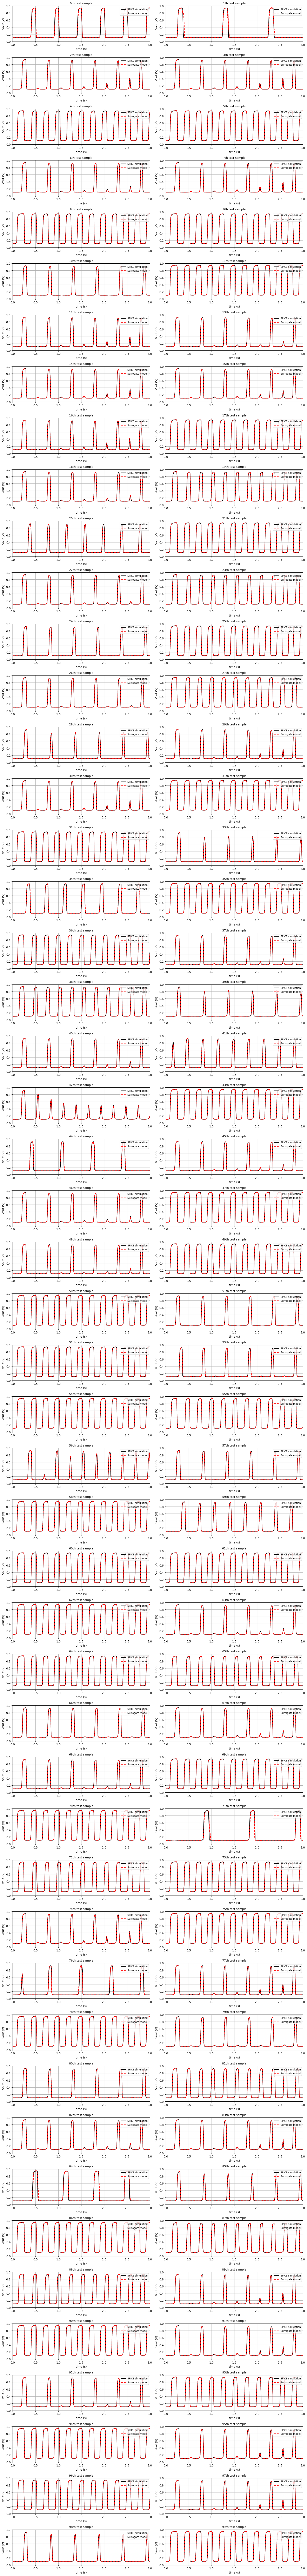

In [27]:
import matplotlib.cm as cm

# Assuming Y_test and Y_test_pred are your data arrays

n_rows = 50
n_cols = 2
n_total = n_rows * n_cols

t = np.linspace(0,3,300)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*(n_rows//n_cols)))  # Adjust the figure size here

for i, k in enumerate(range(n_total)):
    row = i // n_cols
    col = i % n_cols

    ax = axs[row, col]
    
    ax.plot(t, Y_vis[k, :].detach().numpy(), lw=2, linestyle='-', c='black', label='SPICE simulation')
    ax.plot(t, Y_test_pred[k, :].detach().numpy(), lw=2, linestyle='--', c='red', label='Surrogate model')
    ax.set_xlim([0,3])
    ax.set_ylim([0,1])
    ax.legend(loc='upper right', fontsize='small')
    ax.set_xlabel('time (s)', fontsize=10)
    ax.set_ylabel('Vout (V)', fontsize=10)
    ax.set_title(f'{k}th test sample', fontsize=10)
    ax.grid(True)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.savefig('all_subplots.pdf', format='pdf')
plt.show()


In [28]:
spice = Y_vis.detach().cpu().numpy()
transformer = Y_test_pred.detach().cpu().numpy()

np.savetxt("./data/Y_test_pred.csv", transformer, delimiter=",")
np.savetxt("./data/Y_test.csv", spice, delimiter=",")